# HAR Classification - EDA & Modeling

## Project Information

Experiments were carried out with a group of 30 volunteers
 * age range: 19 - 48 years
 * Samsung Galaxy SII worn on waist
  
**Basic Experiments**
 * Static Postures
     * standing
     * sitting
     * lying
 * Dynamic Activities
     * walking
     * walking downstairs
     * walking upstairs
 * Postural Transitions
     * stand to sit
     * sit to stand
     * sit to lie
     * lie to sit
     * stand to lie
     * lie to stand
     
**Data**
 * tri-axial measurements of 
     * Acceleration
     * Angular Velocity
  
 * X = a 561-feature vector with time and frequency domain variables.
 * y = Its associated activity label.
 * An identifier of the subject who carried out the experiment. 
 * Partitioned Randomly
     * 70% training
     * 30% testing
  
 * Window is 2.56 seconds
 * 128 sensor readings per window
 * Features are normalized and bounded within [-1,1].
 * Each feature vector is a row on the 'X' and 'y' files.
 * The units used for the accelerations (total and body) are 'g's.
 * The gyroscope units are rad/sec
 


## Target Vector Labels

In [1]:
label_dict ={ 
 1 :'WALKING',             
 2 :'WALKING_UPSTAIRS',    
 3 :'WALKING_DOWNSTAIRS',  
 4 :'SITTING',             
 5 :'STANDING',            
 6 :'LAYING',              
 7 :'STAND_TO_SIT',        
 8 :'SIT_TO_STAND',        
 9 :'SIT_TO_LIE',          
 10 :'LIE_TO_SIT',          
 11 :'STAND_TO_LIE',        
 12 :'LIE_TO_STAND'} 

## Import Statements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

## Load Data
Data is already separated into a training and testing dataset.  I will recombine the data such that dimensionality reduction techniques can be applied.

### Load text files

In [3]:
# training data
train_data = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\Train\X_train.txt"
train_labels = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\Train\y_train.txt"

# testing data
test_data = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\Test\X_test.txt"
test_labels = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\Test\y_test.txt"

# column names (feature names)
col_names = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\features.txt"

### Fix column header names
need to rename 2nd and 3rd measurements for 14 columns.  I should replace this approach with a function.  However for now, I will proceed to exploratory data analysis. 

In [4]:
# create columns dataframe
columns = pd.read_csv(col_names, sep='\n', header=None, names=['Features'])

# strip whitespace from each column name
columns['Features'] = columns['Features'].str.strip()

# set column names to list
col_names = list(columns['Features'])

# empty set to capture duplicates
duplicates = set()

# for loop to capture duplicate feature names
for i in col_names:
    if col_names.count(i) > 1:
        duplicates.add(i)
duplicates

{'fBodyAcc-Kurtosis-1',
 'fBodyAcc-Skewness-1',
 'fBodyAcc-ropy-1',
 'fBodyAccJerk-Kurtosis-1',
 'fBodyAccJerk-Skewness-1',
 'fBodyAccJerk-ropy-1',
 'fBodyGyro-Kurtosis-1',
 'fBodyGyro-Skewness-1',
 'fBodyGyro-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAccJerk-ropy-1',
 'tBodyGyro-ropy-1',
 'tBodyGyroJerk-ropy-1',
 'tGravityAcc-ropy-1'}

In [5]:
# rename duplicated columns

# fBodyAcc-Kurtosis-1
col_names[299] = 'fBodyAcc-Kurtosis-2'
col_names[301] = 'fBodyAcc-Kurtosis-3'

# fBodyAcc-Skewness-1
col_names[298] = 'fBodyAcc-Skewness-2'
col_names[300] = 'fBodyAcc-Skewness-3'

# fBodyAcc-ropy-1
col_names[288] = 'fBodyAcc-ropy-2'
col_names[289] = 'fBodyAcc-ropy-3'

# fBodyAccJerk-Kurtosis-1
col_names[378] = 'fBodyAccJerk-Kurtosis-2'
col_names[380] = 'fBodyAccJerk-Kurtosis-3'

# 'fBodyAccJerk-Skewness-1'
col_names[377] = 'fBodyAccJerk-Skewness-2'
col_names[379] = 'fBodyAccJerk-Skewness-3'

# 'fBodyAccJerk-ropy-1'
col_names[367] = 'fBodyAccJerk-ropy-2'
col_names[368] = 'fBodyAccJerk-ropy-3'

# 'fBodyGyro-Kurtosis-1'
col_names[457] = 'fBodyGyro-Kurtosis-2'
col_names[459] = 'fBodyGyro-Kurtosis-3'

# 'fBodyGyro-Skewness-1'
col_names[456] = 'fBodyGyro-Skewness-2'
col_names[458] = 'fBodyGyro-Skewness-3'

# 'fBodyGyro-ropy-1'
col_names[446] = 'fBodyGyro-ropy-2'
col_names[447] = 'fBodyGyro-ropy-3'

# 'tBodyAcc-ropy-1'
col_names[23] = 'tBodyAcc-ropy-2'
col_names[24] = 'tBodyAcc-ropy-3'

# 'tBodyAccJerk-ropy-1'
col_names[103] = 'tBodyAccJerk-ropy-2'
col_names[104] = 'tBodyAccJerk-ropy-3'

# 'tBodyGyro-ropy-1'
col_names[143] = 'tBodyGyro-ropy-2'
col_names[144] = 'tBodyGyro-ropy-3'

# 'tBodyGyroJerk-ropy-1'
col_names[183] = 'tBodyGyroJerk-ropy-2'
col_names[184] = 'tBodyGyroJerk-ropy-3'

# 'tGravityAcc-ropy-1'
col_names[63] = 'tGravityAcc-ropy-2'
col_names[64] = 'tGravityAcc-ropy-3'


### Construct Dataframes for training and testing data

In [6]:
# construct dataframes
X_train = pd.read_csv(train_data, sep=' ', header=None, names=col_names)
y_train_df = pd.read_csv(train_labels, sep=' ', header=None, names=['Labels'])

X_test = pd.read_csv(test_data, sep=' ', header=None, names=col_names)
y_test_df = pd.read_csv(test_labels, sep=' ', header=None, names=['Labels'])

In [7]:
# data shapes to verify final dataframe shape
print(X_train.shape, X_test.shape)

(7767, 561) (3162, 561)


In [8]:
# flatten target vectors
y_train = np.ravel(y_train_df)
y_test = np.ravel(y_test_df)

In [9]:
# check target vector shape
print(y_train.shape, y_test.shape)

(7767,) (3162,)


## Exploratory Data Analysis
Check the dataset for balance between all the activities.  It is likely that the activity transitions (sit-to-stand, sit-to-lay, etc.) will be under represented.  A strategy may need to be developed to deal with imbalance.

* balance of labeled features (human activities)
* visualize the activtity movement data

### Activity Balance in Dataset

In [10]:
# convert to dataframe
y = pd.DataFrame(data= y_train, columns=['Labels_Int'])

# add label names
y['Labels']= y['Labels_Int'].map(label_dict)

# group categories and get count
cat_counts = y.groupby('Labels').size()

# sort values for plotting
cat_counts.sort_values(ascending=False, inplace=True)

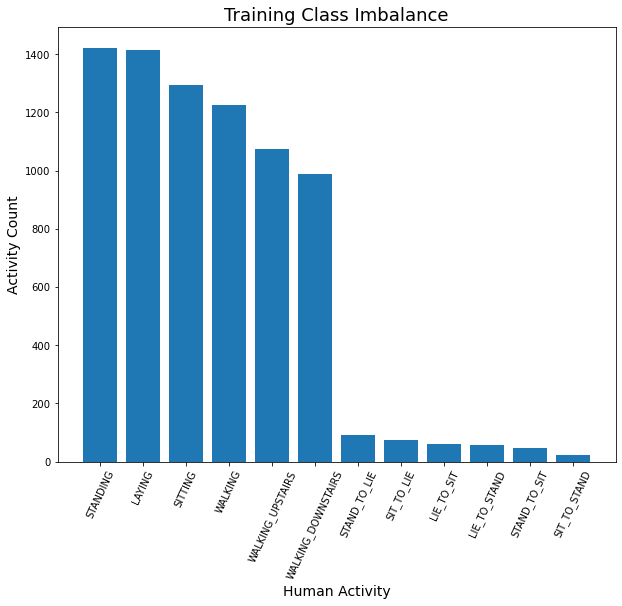

In [11]:
# make bar plot of label counts
plt.figure(figsize=(10,8))
plt.bar(x=cat_counts.index, height=cat_counts.values)
plt.xticks(rotation=65)
plt.xlabel('Human Activity', fontsize=14)
plt.ylabel('Activity Count', fontsize=14)
plt.title('Training Class Imbalance', fontsize=18);


**Discussion:**  
The training dataset shows clear grouping between the postural transitions and the static postures and dynamic activities.  This dataset is imbalanced.  However, I suspect unseen future data will have this same imbalance as people generally do not spend much time in postural transitions as that is physically uncomfortable for most people. 

In [12]:
# convert to dataframe
y = pd.DataFrame(data= y_test, columns=['Labels_Int'])

# add label names
y['Labels']= y['Labels_Int'].map(label_dict)

# group categories and get count
cat_counts = y.groupby('Labels').size()

# sort values for plotting
cat_counts.sort_values(ascending=False, inplace=True)

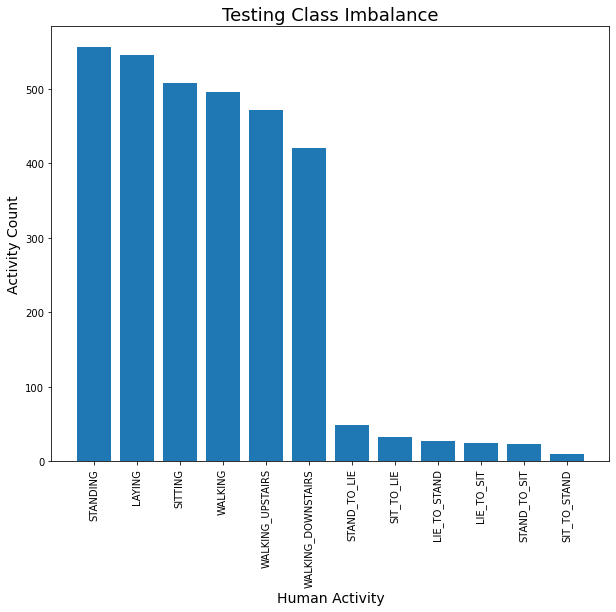

In [13]:
# make bar plot of label counts
plt.figure(figsize=(10,8))
plt.bar(x=cat_counts.index, height=cat_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Human Activity', fontsize=14)
plt.ylabel('Activity Count', fontsize=14)
plt.title('Testing Class Imbalance', fontsize=18);

**Discussion:**
Within each of the training and testing datasets, the distribution of activity classes is not even.  However, the activities representing the transition to and from sitting are balanced among the training and testing data sets, and the same is true for the performed activities (standing, laying, sitting, walking, upstairs, downstairs). Overall, this dataset may be a candidate for a over/under sampling strategy.  For now, I will model without addressing the data imbalance.

## Plot Time Series Data for One Subject

To better understand what parts of the sensor signals the model should predict, I need a way to visualize the activity movement data.  Plotting a time series is necessary.  Searching the web yielded some great help from [Jason Brownlee](https://machinelearningmastery.com/how-to-model-human-activity-from-smartphone-data/).  The general idea is to plot the sensor signals per participant.  This should reveal the various movements within the experiment.  

In [ ]:
# Code inspired from Jason Brownlee
# https://machinelearningmastery.com/how-to-model-human-activity-from-smartphone-data/

In [14]:
# get a list of the participant ids
p_file = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\Train\subject_id_train.txt"

# read in data as array
participants = pd.read_csv(p_file, sep=' ', header=0, names=['Subject'], squeeze=True)
participants = pd.DataFrame(participants)

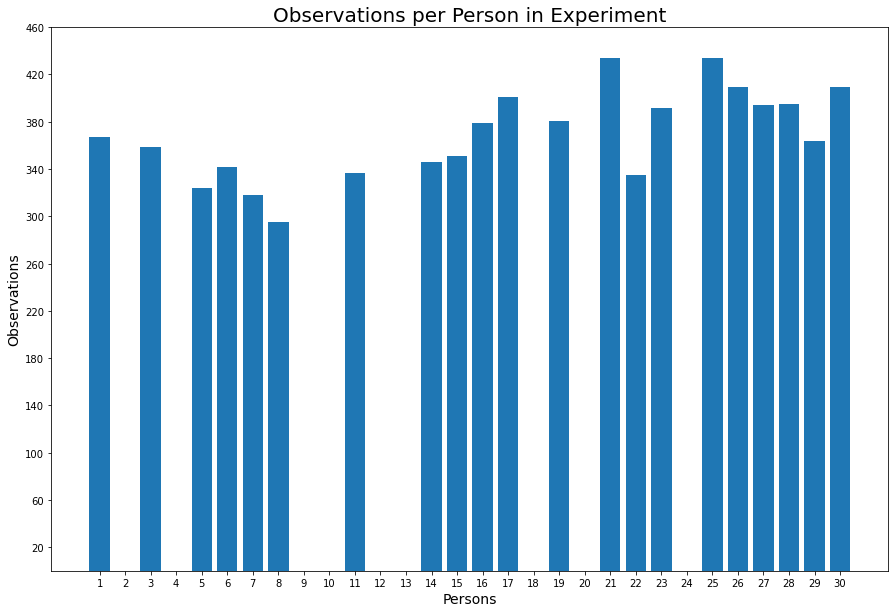

In [15]:
peeps, counts = np.unique(participants, return_counts=True)

# set figure size
plt.figure(figsize=(15,10))

# bar graph
plt.bar(x=peeps, height=counts)
plt.xticks(range(1,31))
plt.yticks(range(20,500,40))
plt.xlabel('Persons', fontsize=14)
plt.ylabel('Observations', fontsize=14)
plt.title('Observations per Person in Experiment', fontsize=20);

## Experiment Person 21
Here I will look at an individual experiment and see what the signal data looks like with respect to the activity labels.

In [16]:
# get all the row index numbers that belong to person 21
subs = participants.loc[participants['Subject'] == 21].index.to_list()

# get corresponding columns in X_train and y_train
df_x = X_train.iloc[subs,:].copy()
df_y = y_train_df.iloc[subs,:].copy()

# add label descriptions to df_y
df_y['Desc'] = df_y['Labels'].map(label_dict)

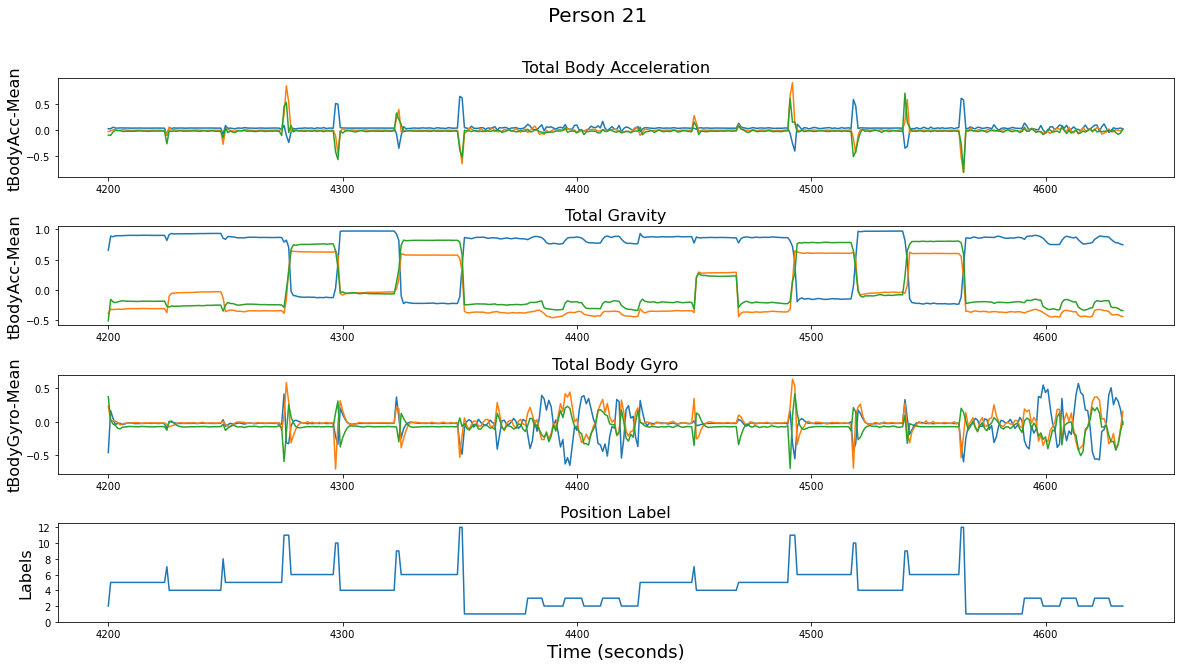

In [17]:
# set figure dimensions and size
f, axs = plt.subplots(4, 1, figsize=(20, 10))

# f.legend(axs, labels=labels, loc='upper right')
plt.subplots_adjust(hspace=0.5)
f.suptitle('Person 21', fontsize=20)
labels = ['tBodyGyro-Mean-1','tBodyGyro-Mean-2','tBodyGyro-Mean-3']

# axs 0
sb.lineplot(ax=axs[0], data=df_x, x=df_x.index, y=df_x['tBodyAcc-Mean-1'])
sb.lineplot(ax=axs[0], data=df_x, x=df_x.index, y=df_x['tBodyAcc-Mean-2'])
sb.lineplot(ax=axs[0], data=df_x, x=df_x.index, y=df_x['tBodyAcc-Mean-3'])
axs[0].set_title('Total Body Acceleration', fontsize=16)
axs[0].set_ylabel('tBodyAcc-Mean', fontsize=16)

# axs 1
sb.lineplot(ax=axs[1], data=df_x, x=df_x.index, y=df_x['tGravityAcc-Mean-1'])
sb.lineplot(ax=axs[1], data=df_x, x=df_x.index, y=df_x['tGravityAcc-Mean-2'])
sb.lineplot(ax=axs[1], data=df_x, x=df_x.index, y=df_x['tGravityAcc-Mean-3'])
axs[1].set_title('Total Gravity', fontsize=16)
axs[1].set_ylabel('tBodyAcc-Mean', fontsize=16)

# axs 2
sb.lineplot(ax=axs[2], data=df_x, x=df_x.index, y=df_x['tBodyGyro-Mean-1'])
sb.lineplot(ax=axs[2], data=df_x, x=df_x.index, y=df_x['tBodyGyro-Mean-2'])
sb.lineplot(ax=axs[2], data=df_x, x=df_x.index, y=df_x['tBodyGyro-Mean-3'])
axs[2].set_title('Total Body Gyro', fontsize=16)
axs[2].set_ylabel('tBodyGyro-Mean', fontsize=16)
# axs[2].legend(labels=labels)


# axs 3
sb.lineplot(ax=axs[3], data=df_y, x=df_y.index, y=df_y['Labels'])
axs[3].set_yticks(range(0,13,2))
axs[3].set_title('Position Label', fontsize=16)
axs[3].set_xlabel('Time (seconds)', fontsize=18)
axs[3].set_ylabel('Labels', fontsize=16);

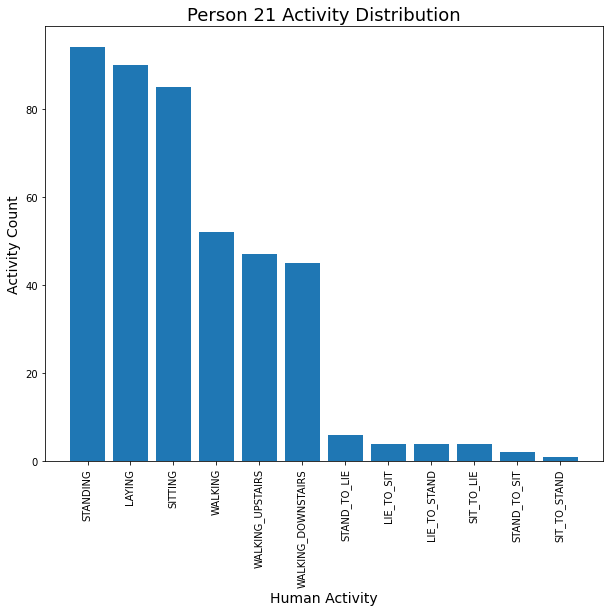

In [18]:
cat_counts = df_y.groupby('Desc').size()
cat_counts.sort_values(ascending=False, inplace=True)

# make bar plot of label counts
plt.figure(figsize=(10,8))
plt.bar(x=cat_counts.index, height=cat_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Human Activity', fontsize=14)
plt.ylabel('Activity Count', fontsize=14)
plt.title('Person 21 Activity Distribution', fontsize=18);

### Experiment Person 8
Here I will look at an individual experiment and see what the signal data looks like with respect to the activity labels.  My hypothesis is that it will look similar to Person 21.

In [19]:
# get all the row index numbers that belong to person 8
subs = participants.loc[participants['Subject'] == 8].index.to_list()

# get corresponding columns in X_train and y_train
df_x = X_train.iloc[subs,:].copy()
df_y = y_train_df.iloc[subs,:].copy()

# add label descriptions to df_y
df_y['Desc'] = df_y['Labels'].map(label_dict)

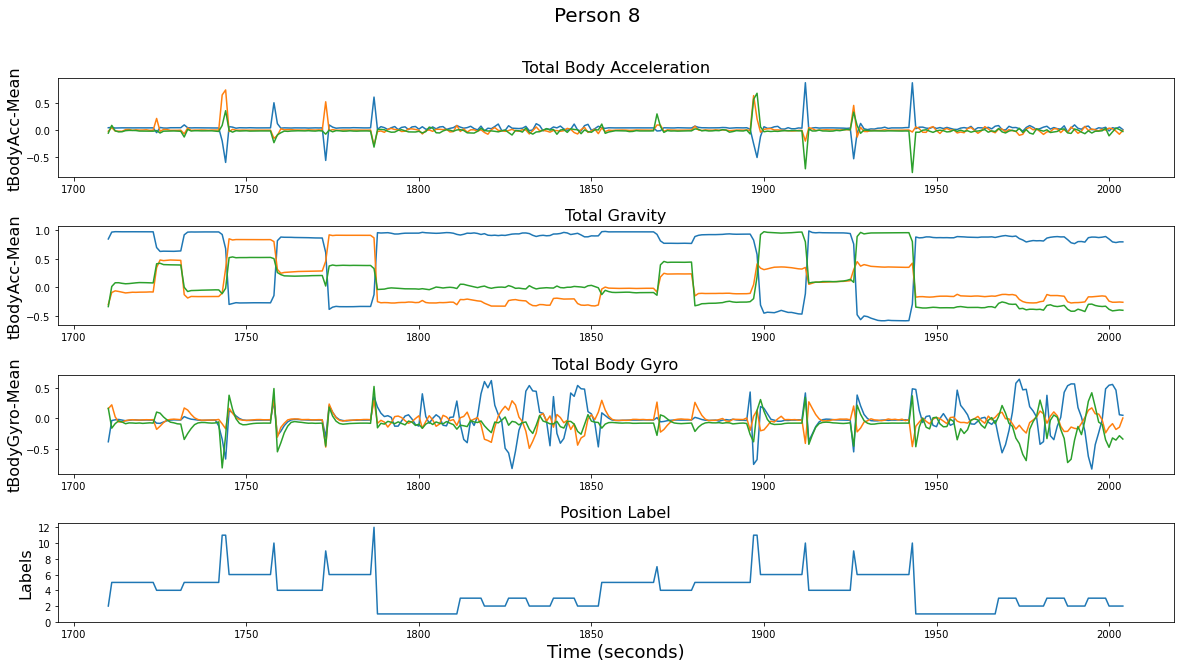

In [20]:
# set figure dimensions and size
f, axs = plt.subplots(4, 1, figsize=(20, 10))

# f.legend(axs, labels=labels, loc='upper right')
plt.subplots_adjust(hspace=0.5)
f.suptitle('Person 8', fontsize=20)
labels = ['tBodyGyro-Mean-1','tBodyGyro-Mean-2','tBodyGyro-Mean-3']

# axs 0
sb.lineplot(ax=axs[0], data=df_x, x=df_x.index, y=df_x['tBodyAcc-Mean-1'])
sb.lineplot(ax=axs[0], data=df_x, x=df_x.index, y=df_x['tBodyAcc-Mean-2'])
sb.lineplot(ax=axs[0], data=df_x, x=df_x.index, y=df_x['tBodyAcc-Mean-3'])
axs[0].set_title('Total Body Acceleration', fontsize=16)
axs[0].set_ylabel('tBodyAcc-Mean', fontsize=16)

# axs 1
sb.lineplot(ax=axs[1], data=df_x, x=df_x.index, y=df_x['tGravityAcc-Mean-1'])
sb.lineplot(ax=axs[1], data=df_x, x=df_x.index, y=df_x['tGravityAcc-Mean-2'])
sb.lineplot(ax=axs[1], data=df_x, x=df_x.index, y=df_x['tGravityAcc-Mean-3'])
axs[1].set_title('Total Gravity', fontsize=16)
axs[1].set_ylabel('tBodyAcc-Mean', fontsize=16)

# axs 2
sb.lineplot(ax=axs[2], data=df_x, x=df_x.index, y=df_x['tBodyGyro-Mean-1'])
sb.lineplot(ax=axs[2], data=df_x, x=df_x.index, y=df_x['tBodyGyro-Mean-2'])
sb.lineplot(ax=axs[2], data=df_x, x=df_x.index, y=df_x['tBodyGyro-Mean-3'])
axs[2].set_title('Total Body Gyro', fontsize=16)
axs[2].set_ylabel('tBodyGyro-Mean', fontsize=16)
# axs[2].legend(labels=labels)


# axs 3
sb.lineplot(ax=axs[3], data=df_y, x=df_y.index, y=df_y['Labels'])
axs[3].set_yticks(range(0,13,2))
axs[3].set_title('Position Label', fontsize=16)
axs[3].set_xlabel('Time (seconds)', fontsize=18)
axs[3].set_ylabel('Labels', fontsize=16);

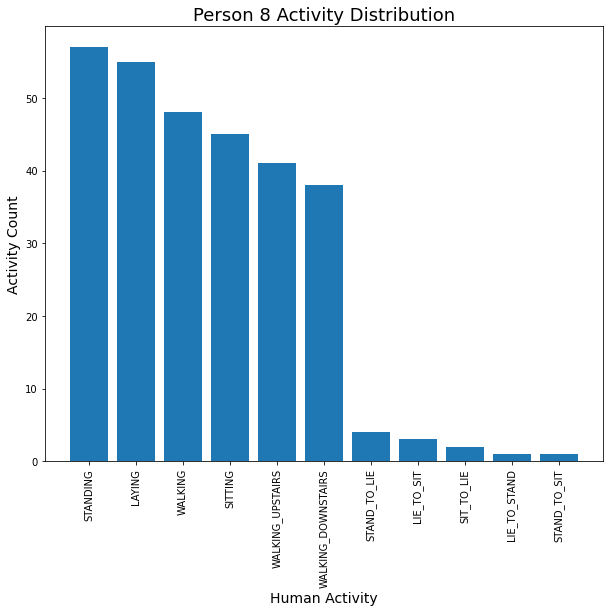

In [21]:
cat_counts = df_y.groupby('Desc').size()
cat_counts.sort_values(ascending=False, inplace=True)

# make bar plot of label counts
plt.figure(figsize=(10,8))
plt.bar(x=cat_counts.index, height=cat_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Human Activity', fontsize=14)
plt.ylabel('Activity Count', fontsize=14)
plt.title('Person 8 Activity Distribution', fontsize=18);

**Discussion:**  The distribution of time spent doing each activity is similar from subject to subject.  This similarity suggests that it is possible to use the movements of a sample of people to predict the movements of more people. 

## Primary Component Analysis
  
The dataset has 561 features and 10,629 observations.  While this may not be considered an extememly large dataset, a reduction in features may benefit any model's ability to generalize to unseen data.  In addition, I suspect there may be some amount of correlation between the features due to origin of the data being only two sensors.  How many primary components can explain up to 90% of the variance in the data?

In [ ]:
# fit PCA
pca = PCA()
pca.fit(X_train)

In [ ]:
# Plot the explained variance ratios of the principal components
plt.figure(figsize=(15,10))
plt.plot(range(1, 562), pca.explained_variance_ratio_[:562], marker = '.')
plt.plot(range(1, 562), pca.explained_variance_ratio_.cumsum()[:562], marker= '.')
plt.xticks(ticks = range(1, 562, 19))
plt.yticks(ticks = np.arange(0,1.1,0.1))
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Proportion of Explained Variance', fontsize=14)
plt.title('Primary Component Analysis - All Features', fontsize=18);

In [ ]:
# Plot the explained variance ratios of the principal components
plt.figure(figsize=(20,15))
plt.plot(range(1, 151), pca.explained_variance_ratio_[:150], marker = '.', label='PC Variance')
plt.plot(range(1, 151), pca.explained_variance_ratio_.cumsum()[:150], marker= '.', label='Cumulative Variance')
plt.xticks(ticks = range(1, 151, 10))
plt.yticks(ticks = np.arange(0,1.04,0.05))
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Proportion of Explained Variance', fontsize=14)
plt.title('Primary Component Analysis - 95% Variance', fontsize=18)
plt.legend();

In [ ]:
# cumulative explained variance ratio
# make list of cumulative explained variance ratio
pca_list = pca.explained_variance_ratio_.cumsum()

# empty dict to capture info
pca_dict = dict()

# for loop to iterate through enumerated pca_list
# capture 95% explained variance ratio

for i,v in enumerate(pca_list):
    if 0.95 <= v <= 0.9505:
        pca_dict[i] = v
    
        print(f'Count of PCAs: {i} Explained Variance: {pca_dict[i]}')

In [ ]:
# fit PCA to data
pca = PCA(n_components = 285)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Model Parameter Tuning with Grid Search

### KNN GridSearchCV

In [ ]:
params = {'n_neighbors': [3, 5, 7, 9, 11],
          'weights': ['uniform','distance'],
          'leaf_size': [20,30,50],
          'p': [1,2]}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, params, cv=5)
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

start 10:34
end 11:03

### Random Forests GridSearchCV

In [ ]:
rf_params = {'n_estimators':[100, 150],
          'max_depth': [5, 10],
          'min_samples_split':[4, 6],
          'min_samples_leaf': [2, 3]}

rf = RandomForestClassifier(random_state=3)
rf_gs = GridSearchCV(rf,rf_params)
rf_gs.fit(X_train, y_train)

In [ ]:
rf_gs.best_params_

In [ ]:
rf_gs.best_score_

start 11:10
end 11:50

### Gradient Boost GridSearchCV

In [ ]:
gbc_params = {'n_estimators': [100, 200],
          'learning_rate': [0.1, .3],
          'max_depth': [3, 5]}

gbc = GradientBoostingClassifier()
gbc_gs = GridSearchCV(gbc, gbc_params)
gbc_gs.fit(X_train, y_train)


In [ ]:
gbc_gs.best_params_

In [ ]:
gbc_gs.best_score_

start 11:55
end 

### Xtreme Gradient Boost GridSearchCV

In [ ]:
xgb_params = {'n_estimators': [100, 200],
          'learning_rate': [0.1, .3],
          'max_depth': [3, 5],
          'gamma': [.1, 1]}

xgb = XGBClassifier()
xgb_gs = GridSearchCV(xgb, xgb_params)
xgb_gs.fit(X_train, y_train)


In [ ]:
xgb_gs.best_params_

In [ ]:
xgb_gs.best_score_

## Run Models

In [ ]:
# create a dictionary of models
# this allows for easy change of model hyperparameters
# code inspired from 
# https://machinelearningmastery.com/evaluate-machine-learning-algorithms-for-human-activity-recognition/

def define_models(models=dict()):
    
    # nonlinear model
    models['knn'] = KNeighborsClassifier(n_neighbors=5, 
                                         p=1, 
                                         leaf_size=20, 
                                         weights='distance')
    
    # ensemble models
    models['rf'] = RandomForestClassifier(n_estimators=100, random_state=3)
    models['xgb'] = XGBClassifier(use_label_encoder=True, random_state=3)
    models['gbc'] = GradientBoostingClassifier(n_estimators=100, random_state=3)
    
    return models

In [ ]:
# create function to evaluate models
# code inspired from 
# https://machinelearningmastery.com/evaluate-machine-learning-algorithms-for-human-activity-recognition/

def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    # fit the model
    model.fit(X_train, y_train)
    
    # get predictions
    preds = model.predict(X_test)
    
    # evaluate model
    accuracy = accuracy_score(y_test, preds)
    
    return accuracy

In [ ]:
# create function to capture model results
# code inspired from 
# https://machinelearningmastery.com/evaluate-machine-learning-algorithms-for-human-activity-recognition/

def model_results(models, X_train, X_test, y_train, y_test):
    
    # dictionary to store results
    results = dict()
    
    # for loop to iterate through dictionary
    for name, model in models.items():
        
        # capture model results
        results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
        
        # progress print statement
        print(f'Model: {name}  Result: {results[name] * 100:.2f}%')
        
    return results

In [ ]:
# create models dictionary
models = define_models()

In [ ]:
# evaluate models and get results
results = model_results(models, X_train, X_test, y_train, y_test)

In [ ]:
df = pd.DataFrame(results, index= [0])
df

In [ ]:
df1 = pd.melt(df, var_name='Model', value_name='Accuracy Score')
df1.sort_values(ascending=False, by='Accuracy Score').reset_index(drop=True)